<a href="https://colab.research.google.com/github/piotrciechowicz/crisis_classifiers/blob/main/crisis_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from sklearn.preprocessing import OneHotEncoder
import plotly.offline as po
import plotly.graph_objs as pg

In [ ]:
import nltk
nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
import pickle

#Functions

In [ ]:
def graph_plot(x, y, title, x_label, y_label):
  fig, ax = plt.subplots(figsize = (30,10), sharey=True)
  ax.plot(x, y)
  ax.set_title(title)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.xaxis.set_tick_params(rotation=90)
  plt.show()

In [ ]:
def graph_bar(x, y, title, x_label, y_label):
  fig, ax = plt.subplots(figsize = (30,10))
  ax.bar(x, y)
  ax.set_title(title)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.xaxis.set_tick_params(rotation=90)
  plt.show()

In [ ]:
def mapa_event(event):
  data_mapa = dict(type='choropleth', 
            locations = group_country['iso'], 
            z = group_country[event], 
            text = group_country['country'])
  layout = dict(title = elem, 
              geo = dict( projection = {'type':'robinson'}, 
                         showlakes = True, 
                         lakecolor = 'rgb(0,191,255)'))
  x = pg.Figure(data = [data_mapa], 
              layout = layout)
  po.iplot(x)

In [ ]:
rcParams.update({'font.size': 20})

# Loading dataset







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/projekt koncowy/2019-08-13-2022-08-22 (1).csv'

# Observing the data

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [ ]:
data.dtypes

data_id               int64
iso                   int64
event_id_cnty        object
event_id_no_cnty      int64
event_date           object
year                  int64
time_precision        int64
event_type           object
sub_event_type       object
actor1               object
assoc_actor_1        object
inter1                int64
actor2               object
assoc_actor_2        object
inter2                int64
interaction           int64
region               object
country              object
admin1               object
admin2               object
admin3               object
location             object
latitude            float64
longitude           float64
geo_precision         int64
source               object
source_scale         object
notes                object
fatalities            int64
timestamp             int64
iso3                 object
dtype: object

In [ ]:
data['event_date'] = pd.to_datetime(data['event_date'])

In [ ]:
data.dtypes

data_id                      int64
iso                          int64
event_id_cnty               object
event_id_no_cnty             int64
event_date          datetime64[ns]
year                         int64
time_precision               int64
event_type                  object
sub_event_type              object
actor1                      object
assoc_actor_1               object
inter1                       int64
actor2                      object
assoc_actor_2               object
inter2                       int64
interaction                  int64
region                      object
country                     object
admin1                      object
admin2                      object
admin3                      object
location                    object
latitude                   float64
longitude                  float64
geo_precision                int64
source                      object
source_scale                object
notes                       object
fatalities          

In [ ]:
df_0 = data.drop(columns = ['data_id','iso','event_id_cnty','event_id_no_cnty','time_precision','actor1','assoc_actor_1','actor2','assoc_actor_2','geo_precision','timestamp','fatalities','admin1','admin2','admin3','iso3'])
df_0.sample(3)

,event_date,year,event_type,sub_event_type,inter1,inter2,interaction,region,country,location,latitude,longitude,source,source_scale,notes
241472,2021-10-01,2021,Violence against civilians,Attack,3,7,37,Caribbean,Puerto Rico,Manati,18.4275,-66.4921,El Nuevo Dia (Puerto Rico),National,"On 1 October 2021, in Manati, Manati, an unkno..."
203726,2021-11-22,2021,Protests,Peaceful protest,6,0,60,Southeast Asia,Malaysia,Mukah,2.8943,112.0914,New Sarawak Tribune,Subnational,"On 22 November 2021, a group of Malaysian nati..."
256321,2021-09-11,2021,Protests,Peaceful protest,6,0,60,Europe,Italy,Bologna,44.4886,11.3316,Bologna Today,Subnational,"On 11 September 2021, at least 200 No Green Pa..."


In [ ]:
enc = OneHotEncoder()

df_1 = pd.DataFrame(enc.fit_transform(df_0[['event_type']]).toarray(), columns = enc.categories_)
df_1.columns = df_1.columns.map(''.join)
df_2 = pd.DataFrame(enc.fit_transform(df_0[['sub_event_type']]).toarray(), columns = enc.categories_)
df_2.columns = df_2.columns.map(''.join)
df = pd.concat((df_0['event_date'],df_0.drop(columns = ['event_date']), df_1, df_2) ,axis = 1)
df.sample(3)

,event_date,year,event_type,sub_event_type,inter1,inter2,interaction,region,country,location,...,Non-state actor overtakes territory,Non-violent transfer of territory,Other,Peaceful protest,Protest with intervention,Remote explosive/landmine/IED,Sexual violence,Shelling/artillery/missile attack,Suicide bomb,Violent demonstration
738603,2019-11-14,2019,Riots,Violent demonstration,5,0,50,Middle East,Lebanon,Khaldah,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
621889,2020-05-24,2020,Protests,Peaceful protest,6,0,60,South Asia,Pakistan,Rawalpindi,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
317625,2021-06-15,2021,Riots,Violent demonstration,5,0,50,Southern Africa,South Africa,Gelvandale,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Visualizing data

##World map with the sum of the incidents




In [ ]:
group_country = df.groupby(['country']).sum().reset_index()
data_iso = data[['country','iso3']].drop_duplicates().sort_values('country').reset_index()
data_iso = data_iso[['iso3']]
group_country['iso'] = data_iso 

In [ ]:
for elem in df['event_type'].unique():  
  mapa_event(elem)
  print()

##Top5

Top 5 countries for all types of event
India            55966
United States    46026
Ukraine          42611
Mexico           42330
Syria            37239
Name: country, dtype: int64


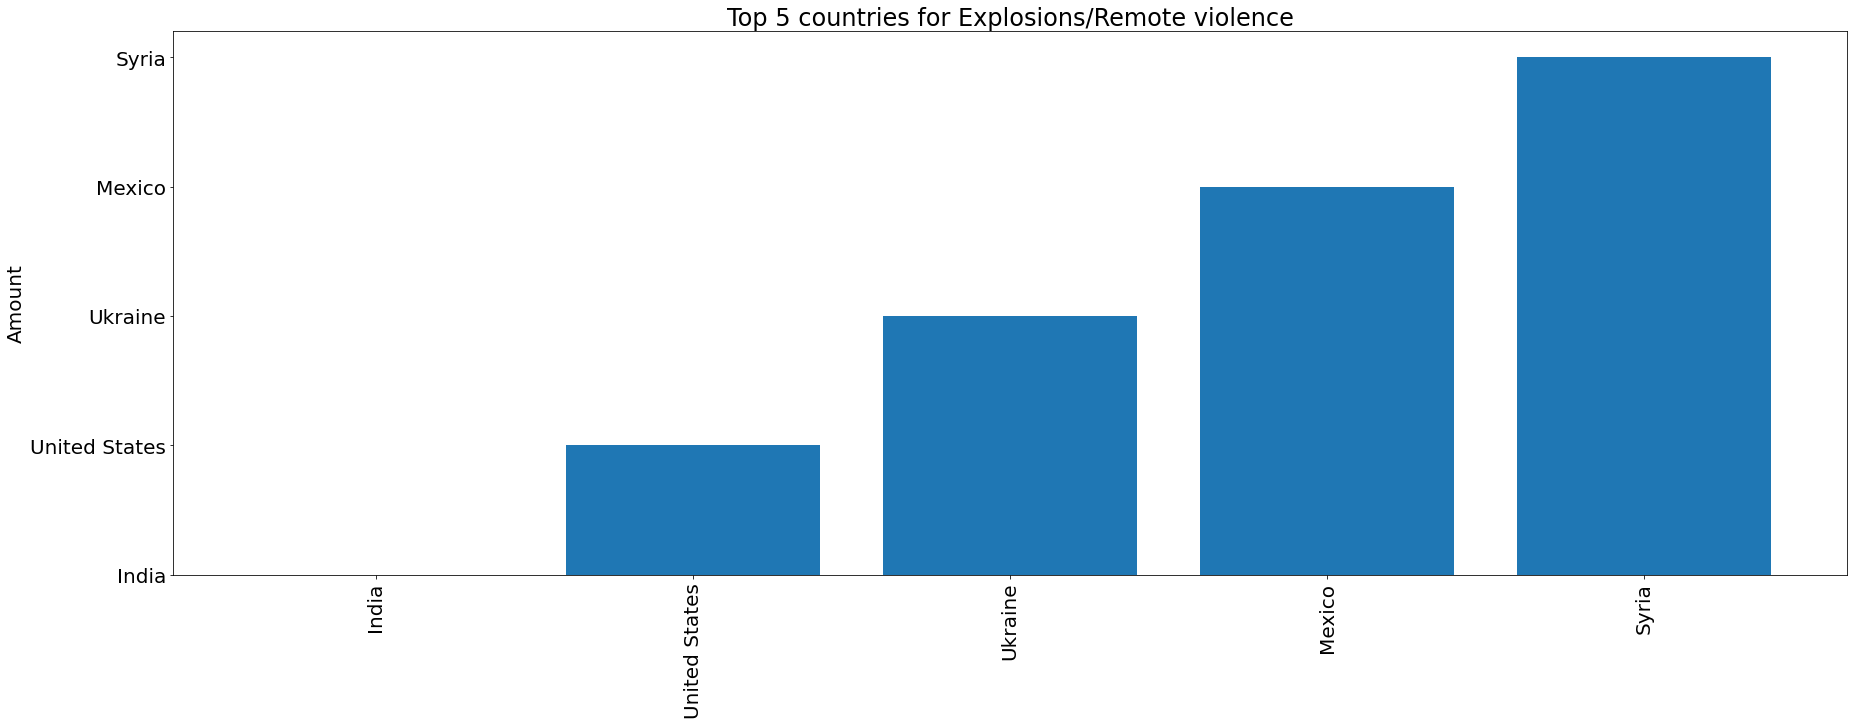


Top 5 countries for Riots
India           5966
Palestine       3607
Mexico          2378
Chile           2312
South Africa    2099
Name: country, dtype: int64


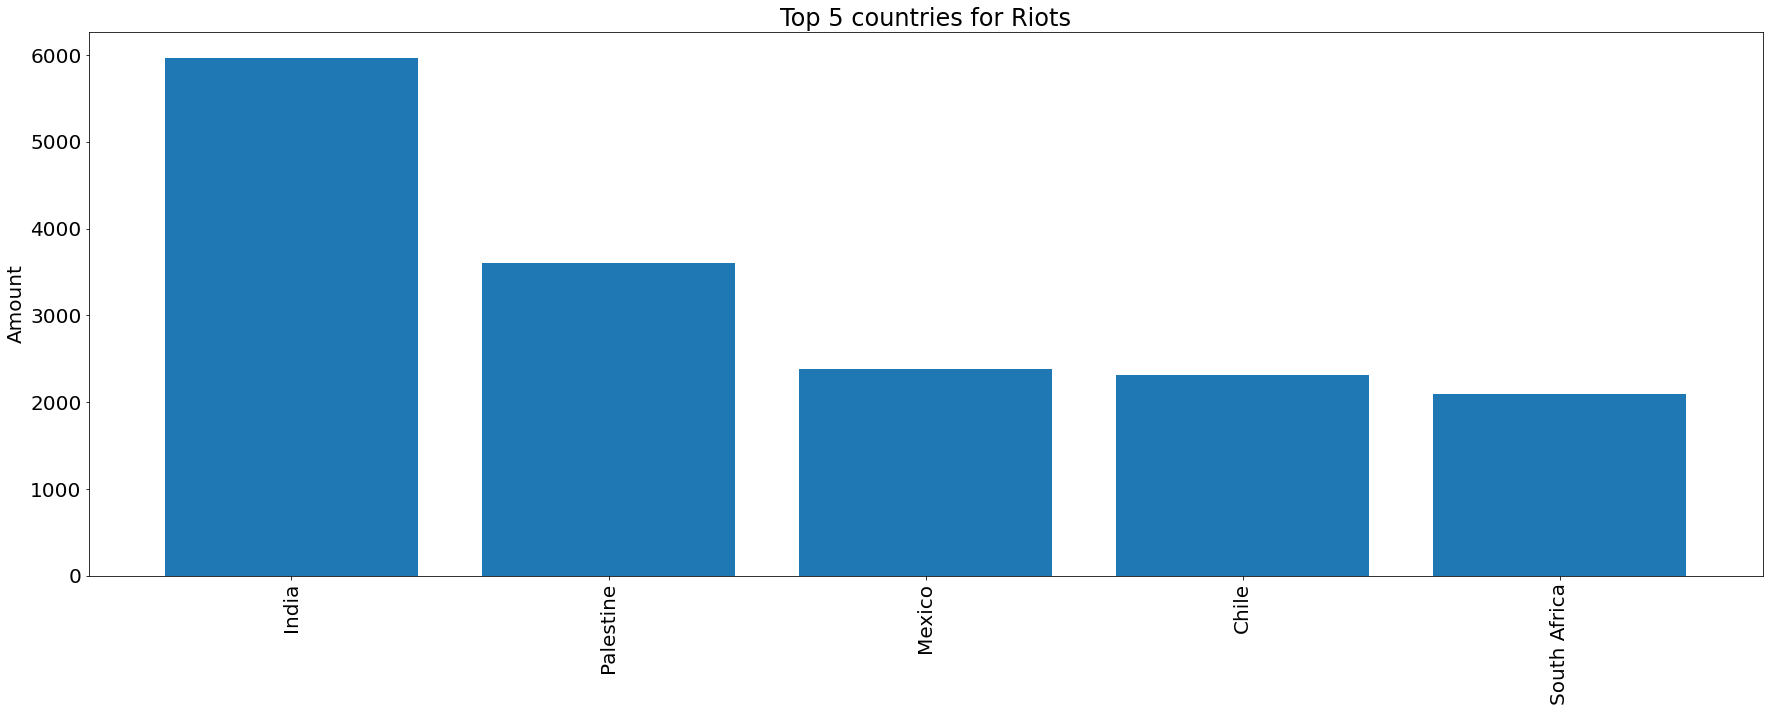


Top 5 countries for Strategic developments
Myanmar    6262
Turkey     3829
Syria      3808
Yemen      2808
Iraq       2029
Name: country, dtype: int64


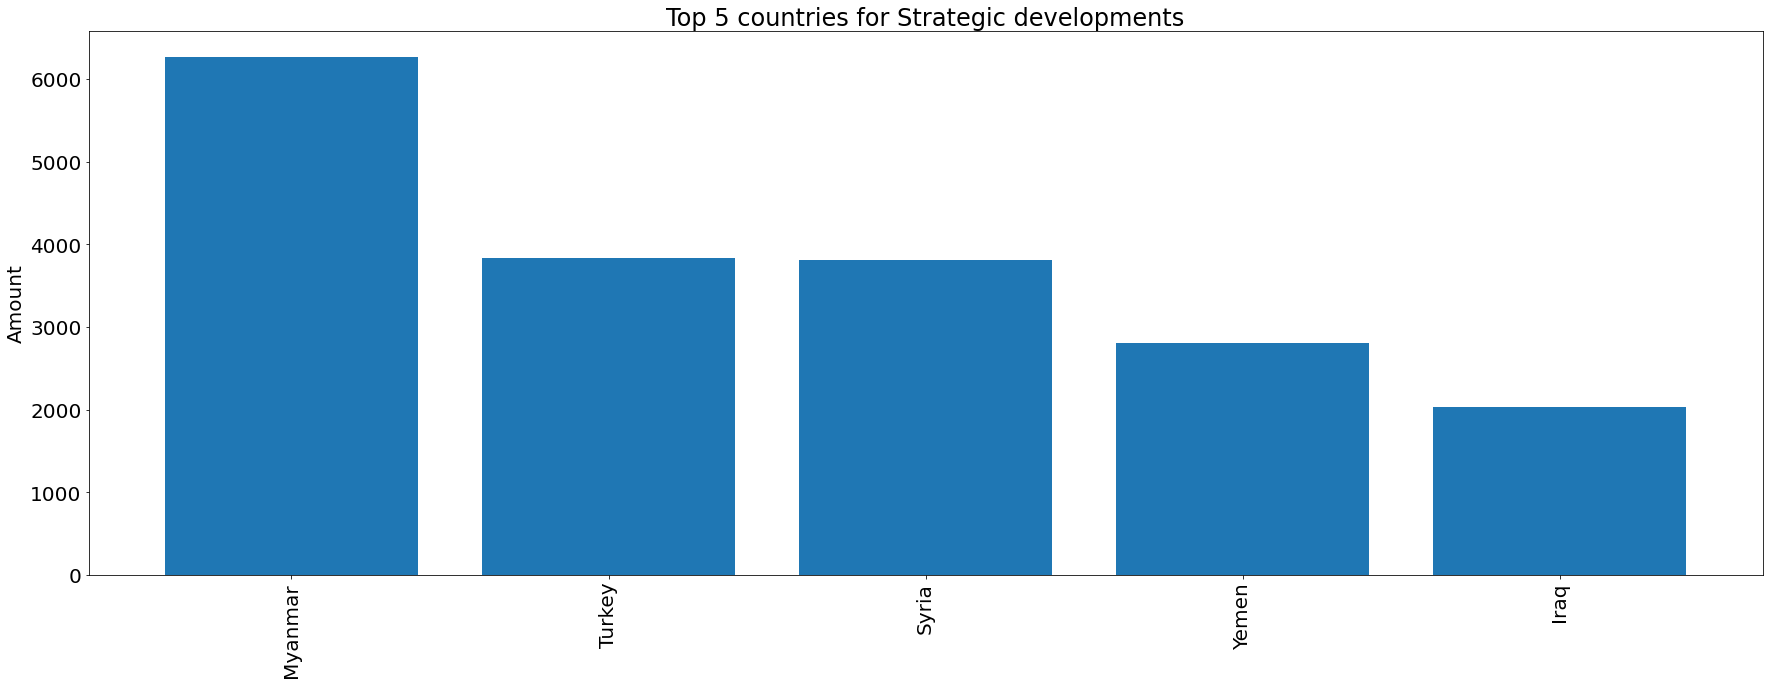


Top 5 countries for Protests
India            44772
United States    42823
Pakistan         21200
Mexico           17867
France           17226
Name: country, dtype: int64


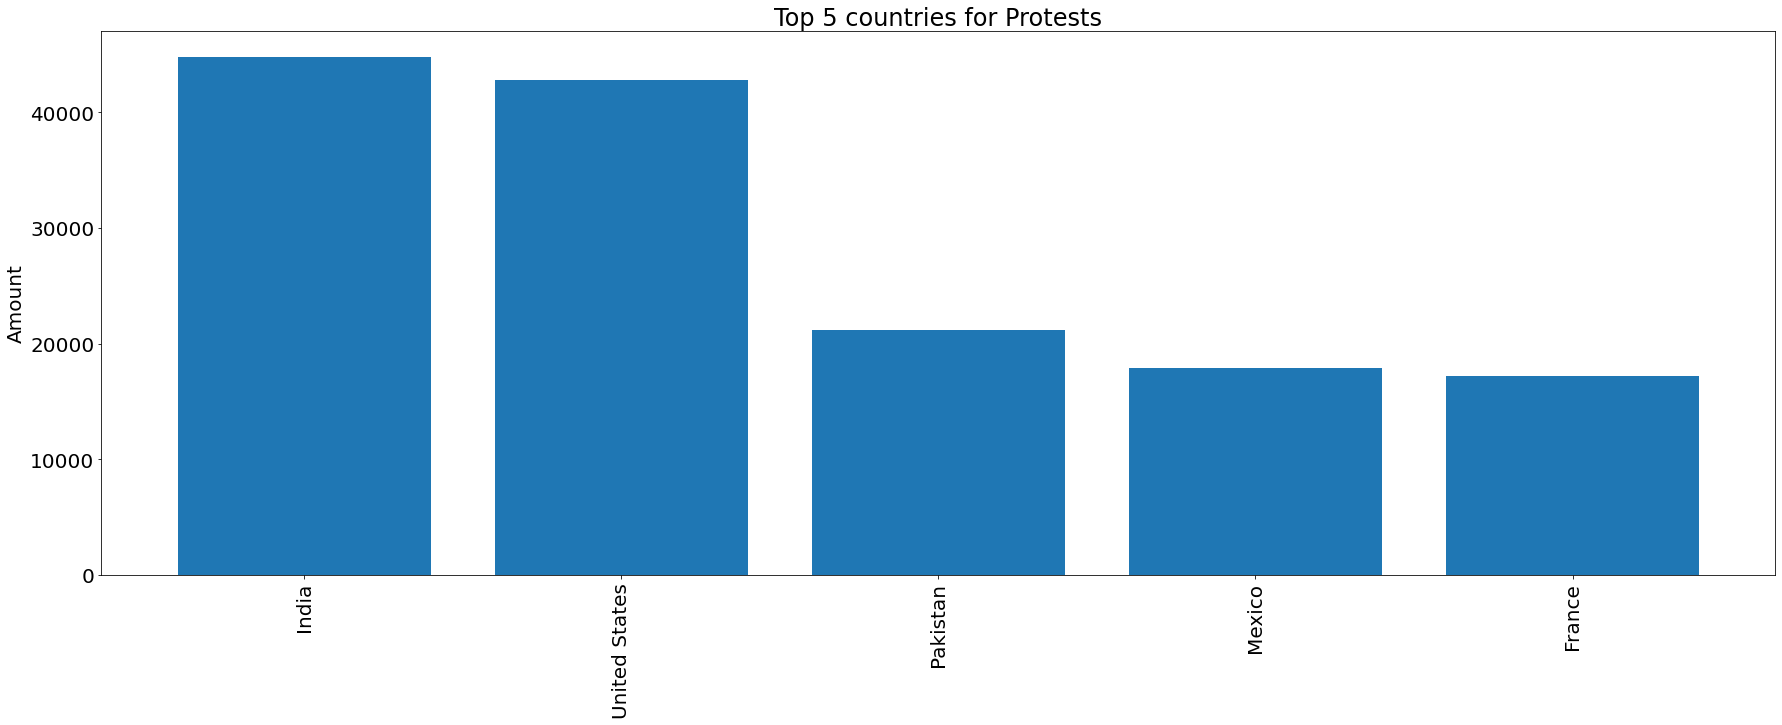


Top 5 countries for Violence against civilians
Mexico                          16813
Brazil                           9237
Syria                            5014
Democratic Republic of Congo     3785
Nigeria                          3760
Name: country, dtype: int64


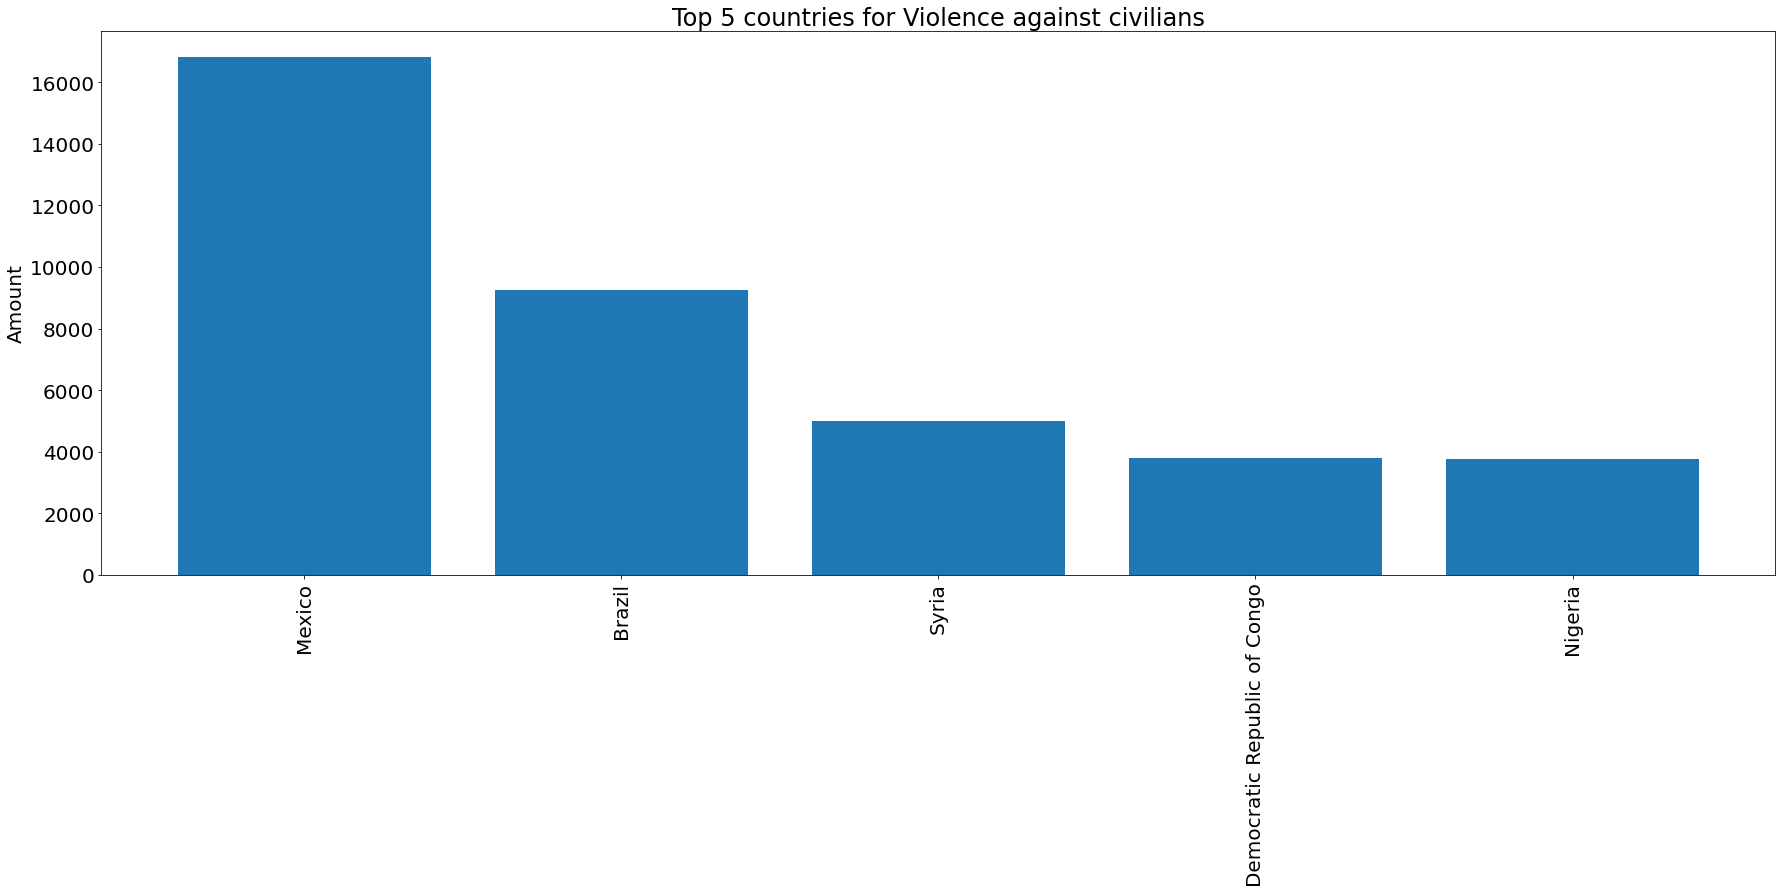


Top 5 countries for Battles
Afghanistan    16794
Ukraine        11588
Brazil         11154
Yemen           9007
Syria           6912
Name: country, dtype: int64


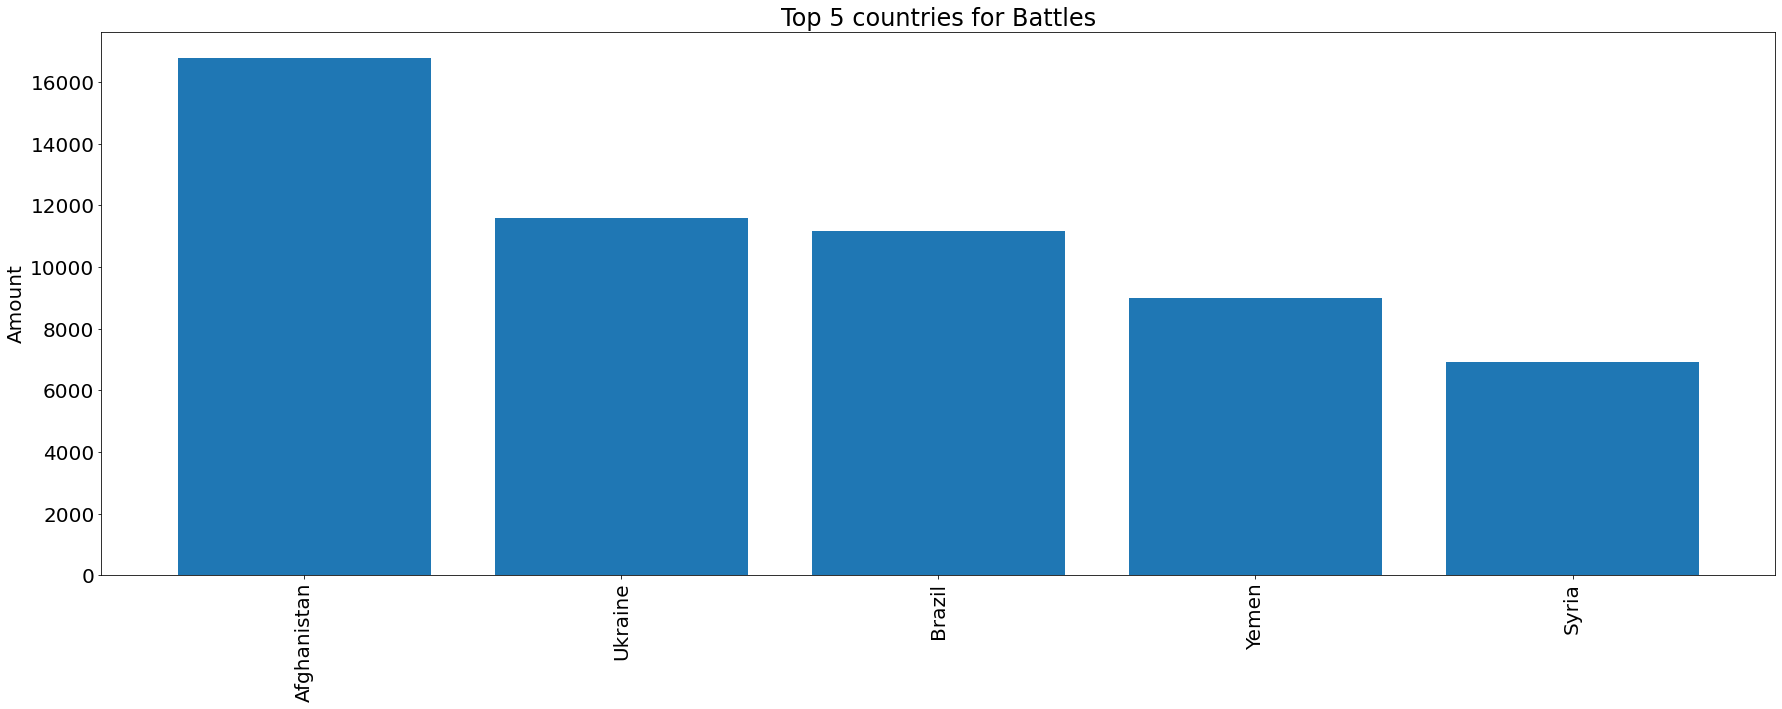


Top 5 countries for Explosions/Remote violence
Ukraine        25714
Syria          20043
Yemen          14439
Afghanistan     7505
Iraq            6807
Name: country, dtype: int64


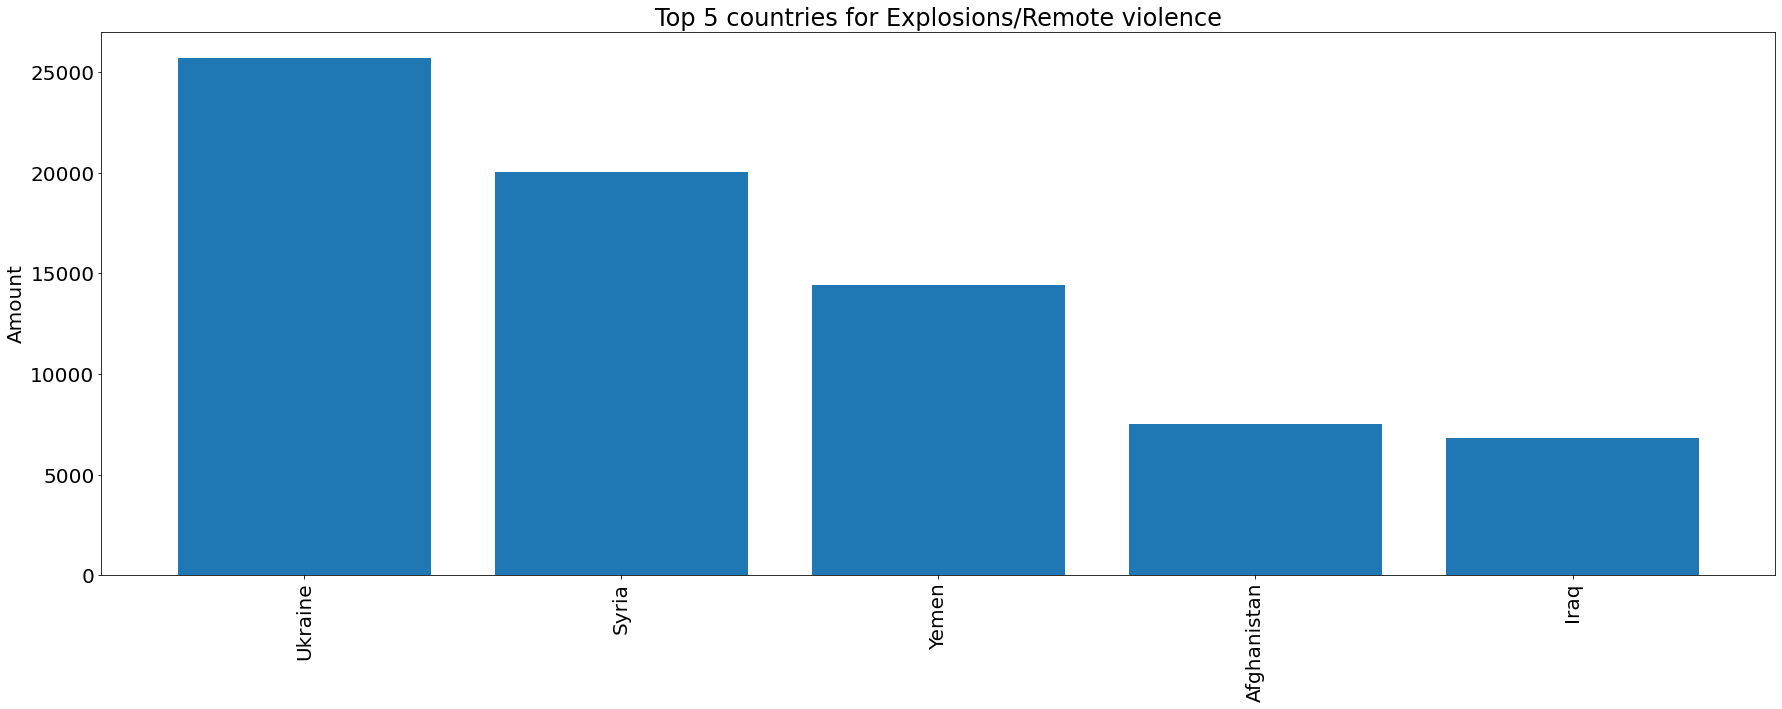

In [ ]:
print(f'Top 5 countries for all types of event')
print(df['country'].value_counts().head())
x_top_all = df['country'].value_counts().head().index
y_top_all = df['country'].value_counts().head().values
graph_bar(x_top_all, x_top_all, f'Top 5 countries for {elem}', '', 'Amount')
print()

for elem in df['event_type'].unique():
  print(f'Top 5 countries for {elem}')
  x_top = df[df['event_type']==elem]['country'].value_counts().head().index
  y_top = df[df['event_type']==elem]['country'].value_counts().head().values
  print(df[df['event_type']==elem]['country'].value_counts().head())
  graph_bar(x_top, y_top, f'Top 5 countries for {elem}', '', 'Amount')
  print()

##Distribution of incidents

In [ ]:
start = df['event_date'].max()
end = df['event_date'].max()

In [ ]:
df_event_date = df.groupby(['event_date']).sum().reset_index()
df_event_date.sample(3)

,event_date,year,inter1,inter2,interaction,latitude,longitude,Battles,Explosions/Remote violence,Protests,...,Non-state actor overtakes territory,Non-violent transfer of territory,Other,Peaceful protest,Protest with intervention,Remote explosive/landmine/IED,Sexual violence,Shelling/artillery/missile attack,Suicide bomb,Violent demonstration
230,2020-03-30,1064540,2071,1162,18623,12674.3274,7532.1026,107.0,91.0,157.0,...,0.0,0.0,9.0,150.0,6.0,9.0,1.0,52.0,0.0,14.0
377,2020-08-24,1434200,3432,1039,32335,17639.7903,7810.3613,101.0,48.0,427.0,...,0.0,0.0,4.0,401.0,23.0,13.0,3.0,16.0,1.0,27.0
149,2020-01-09,1642260,3781,1288,36353,22976.4160,903.6015,118.0,71.0,457.0,...,0.0,0.0,3.0,443.0,12.0,13.0,1.0,31.0,0.0,30.0


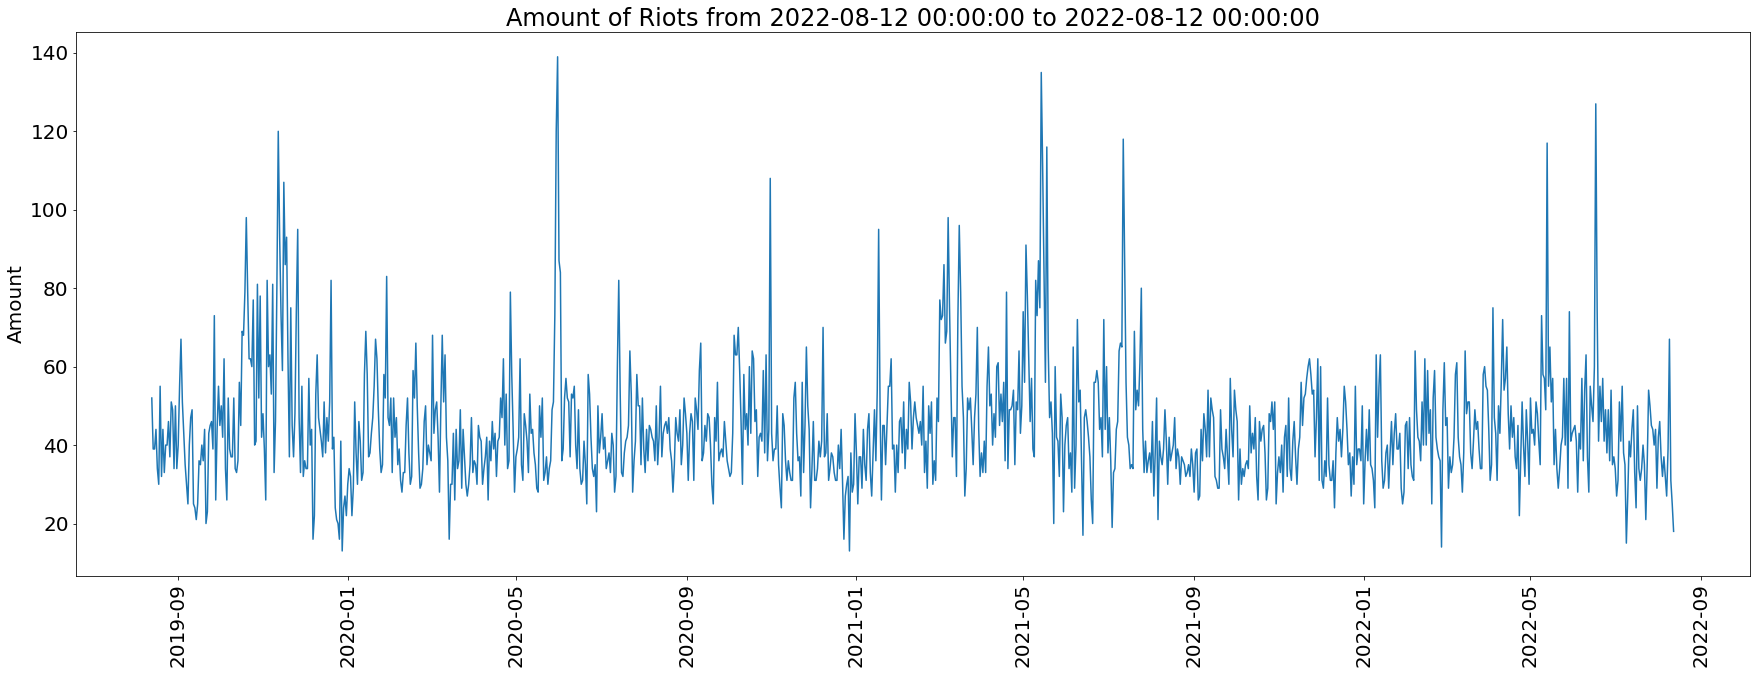

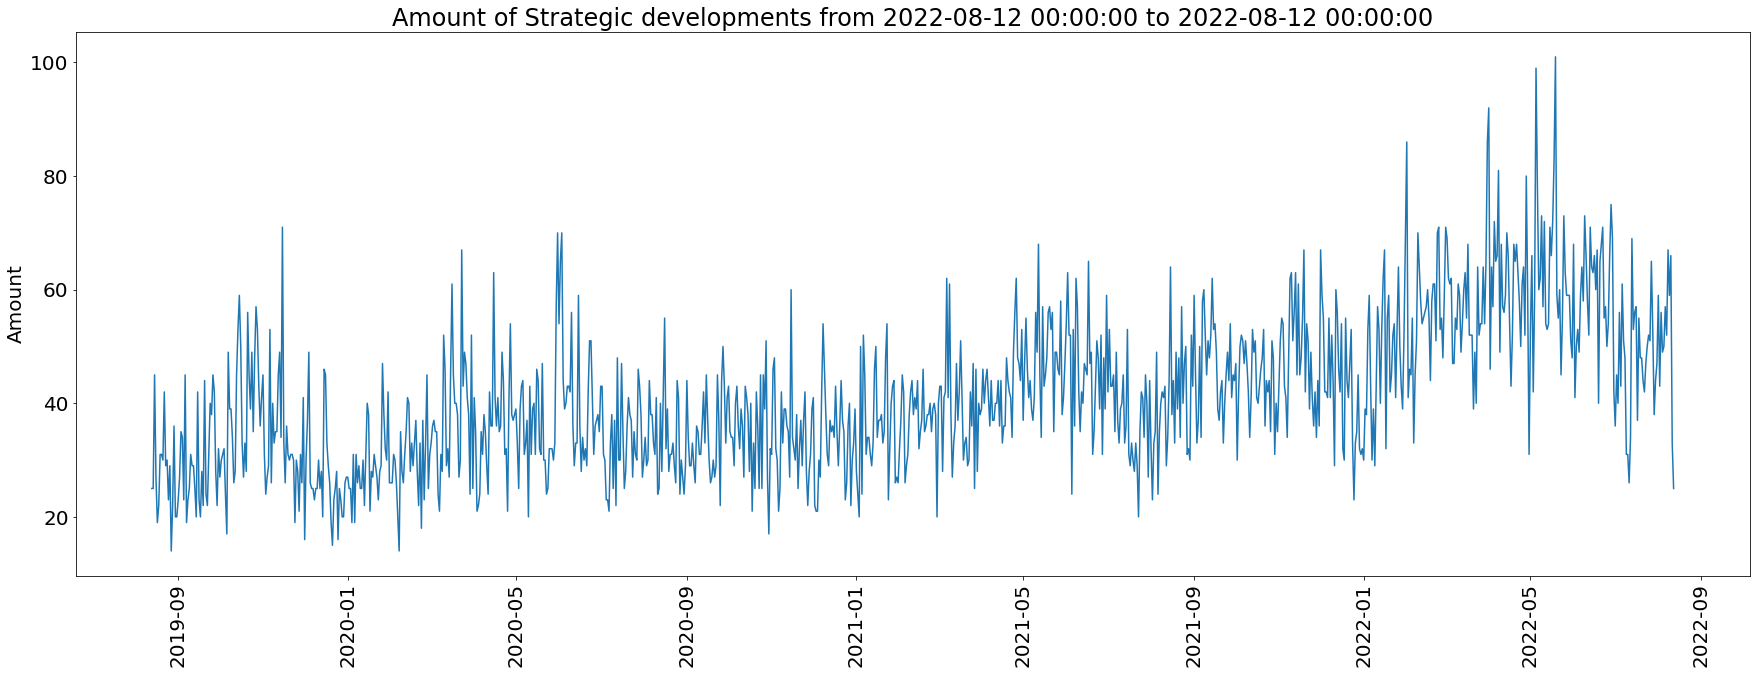

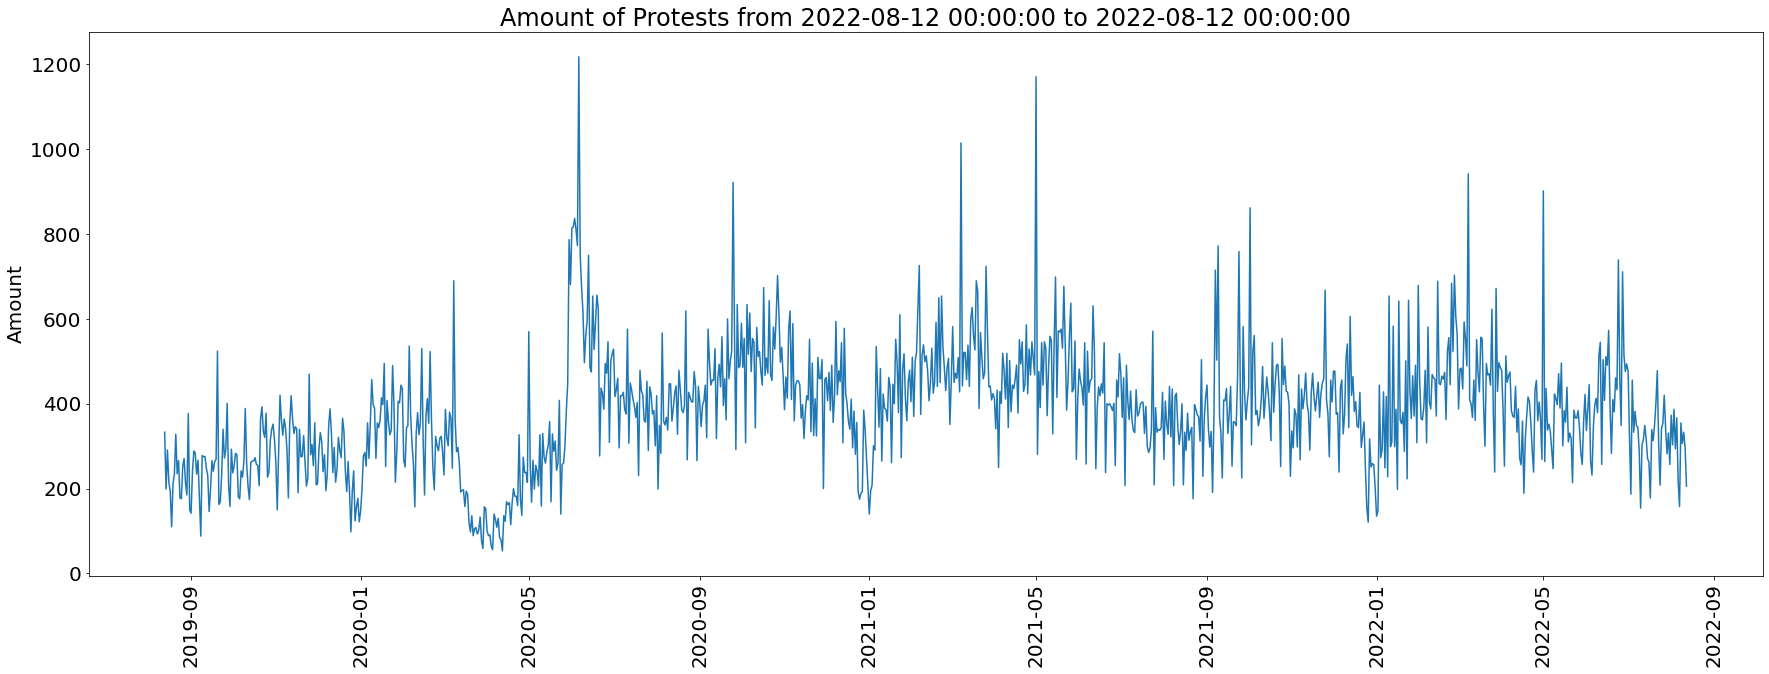

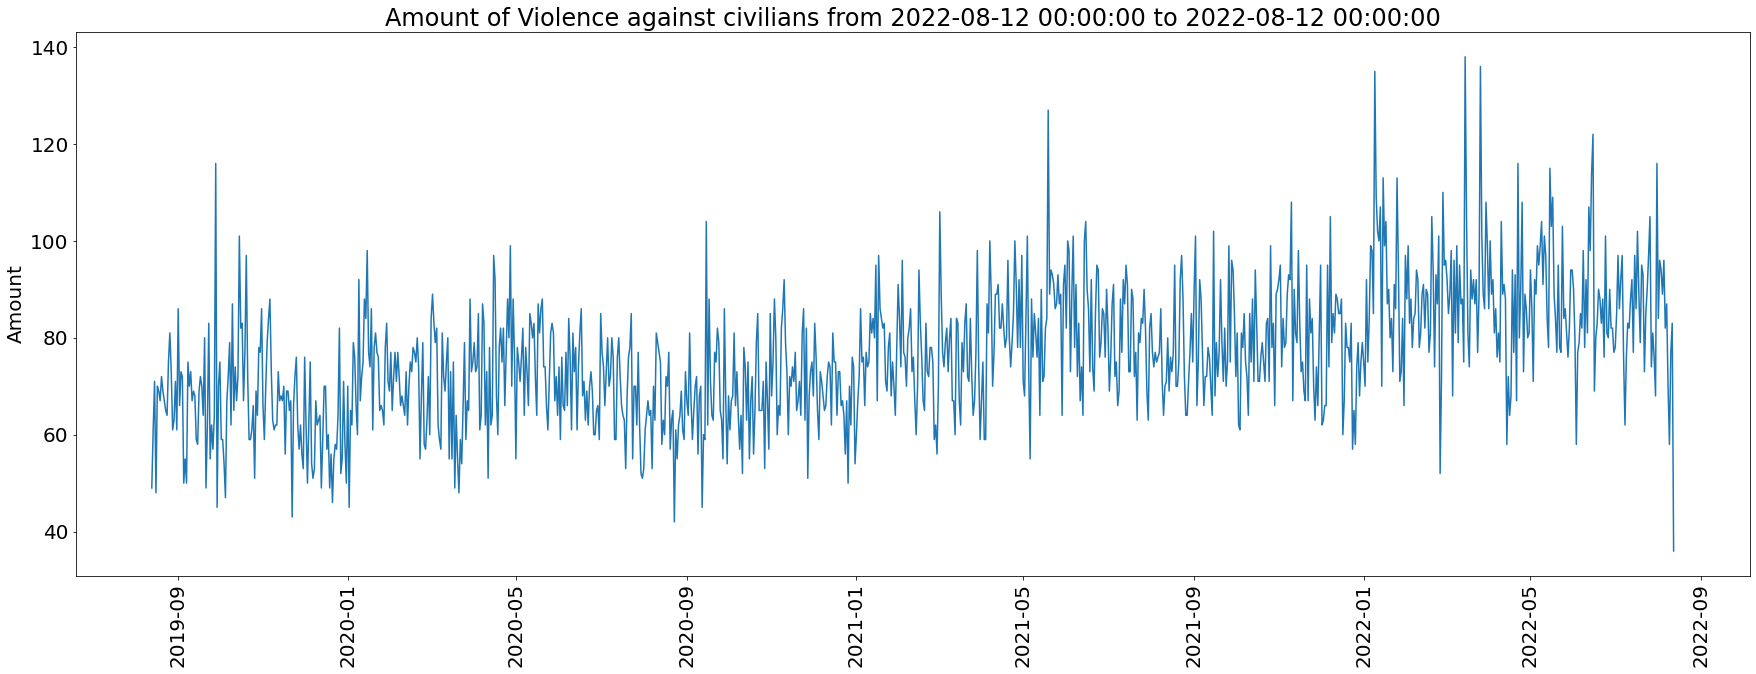

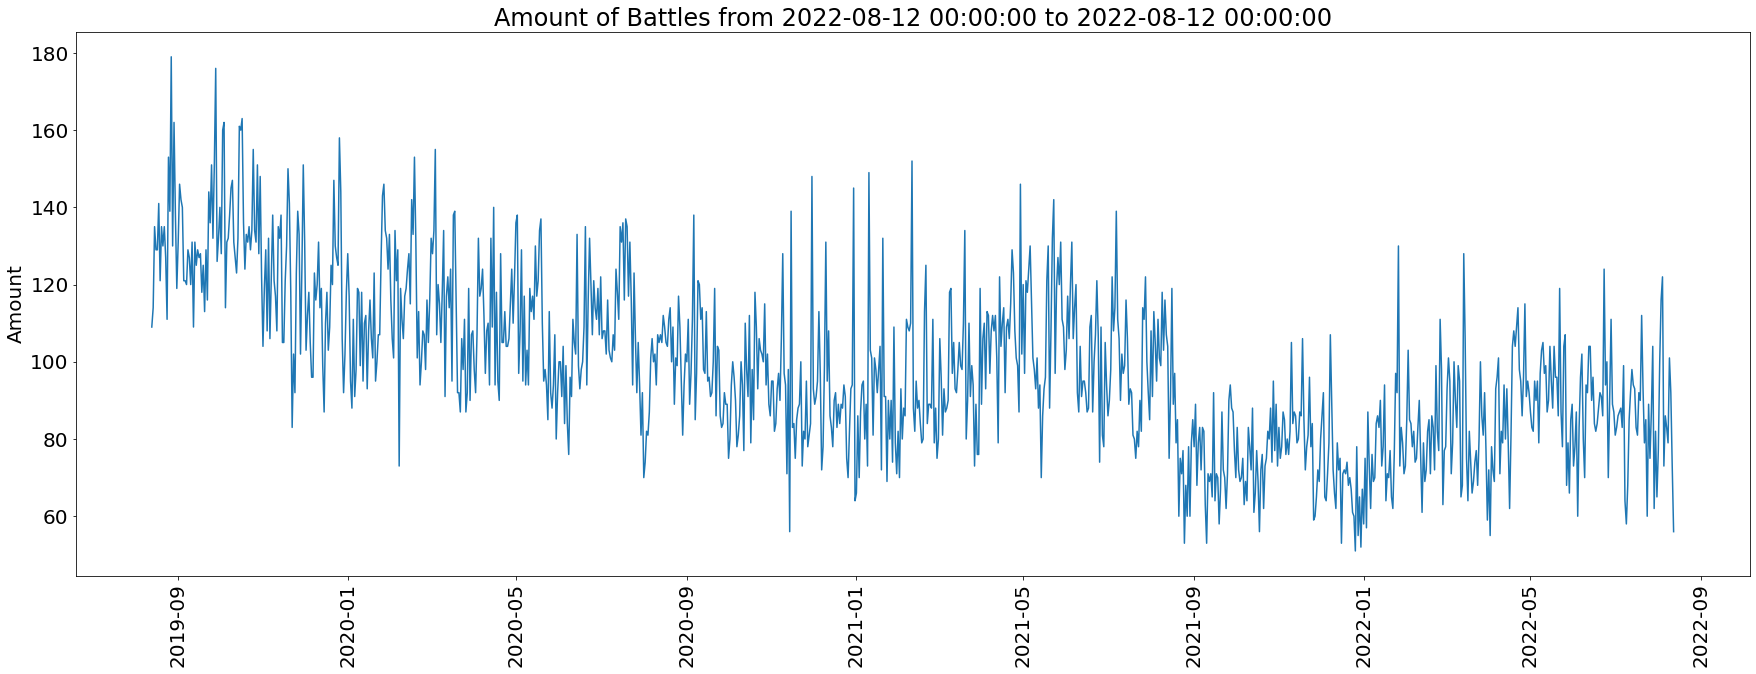

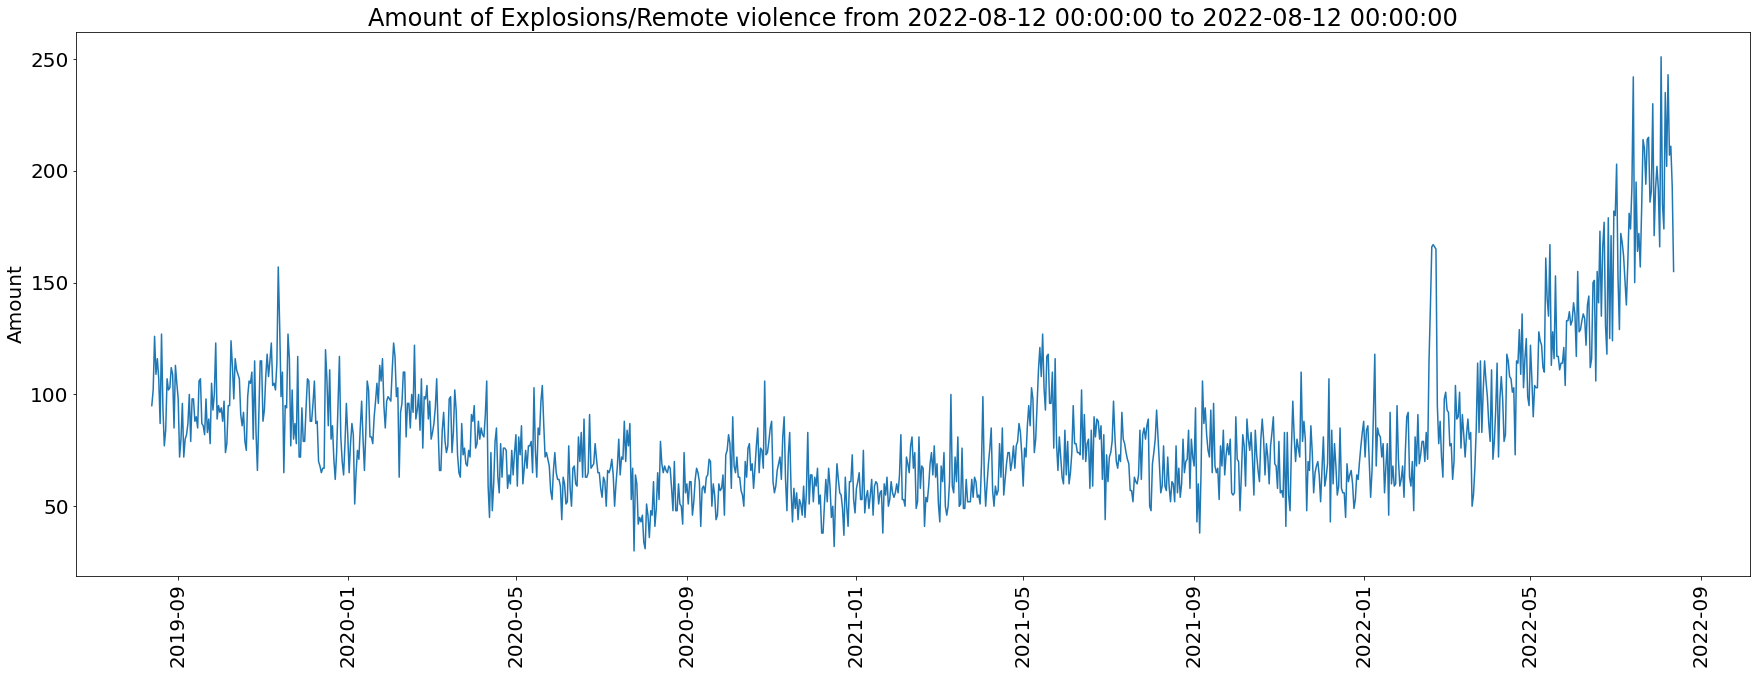

In [ ]:
for elem in df['event_type'].unique():
  graph_plot(df_event_date['event_date'], df_event_date[elem], f'Amount of {elem} from {start} to {end}','', 'Amount')
  print()

## Total incidents per region

In [ ]:
df_region = df.groupby(['region']).sum().reset_index()
df_region.sample(3)

,region,year,inter1,inter2,interaction,latitude,longitude,Battles,Explosions/Remote violence,Protests,...,Non-state actor overtakes territory,Non-violent transfer of territory,Other,Peaceful protest,Protest with intervention,Remote explosive/landmine/IED,Sexual violence,Shelling/artillery/missile attack,Suicide bomb,Violent demonstration
0,Antarctica,12128,36,0,360,-4.513901e+02,8.002880e+01,0.0,0.0,6.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Caucasus and Central Asia,91988350,140078,80810,1093069,1.685315e+06,2.810170e+06,24222.0,8178.0,8577.0,...,495.0,105.0,161.0,7985.0,562.0,3575.0,20.0,1577.0,91.0,225.0
5,Eastern Africa,50409469,79342,96718,762725,9.963824e+03,9.742130e+05,8742.0,2046.0,3346.0,...,120.0,105.0,152.0,2802.0,432.0,1016.0,231.0,334.0,54.0,784.0


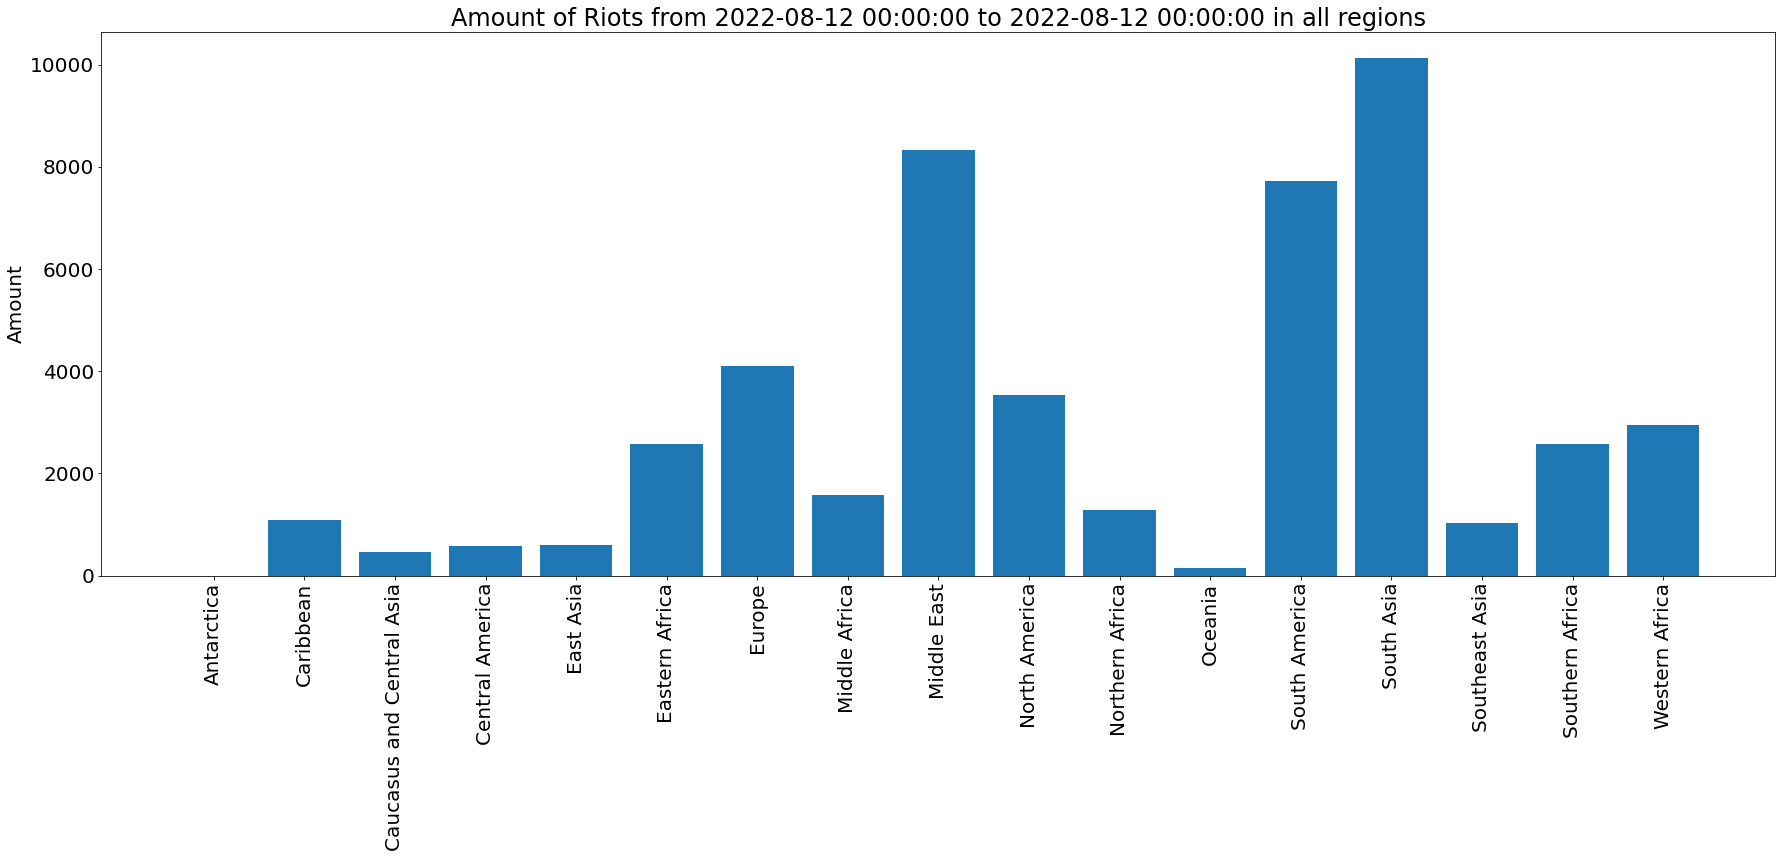

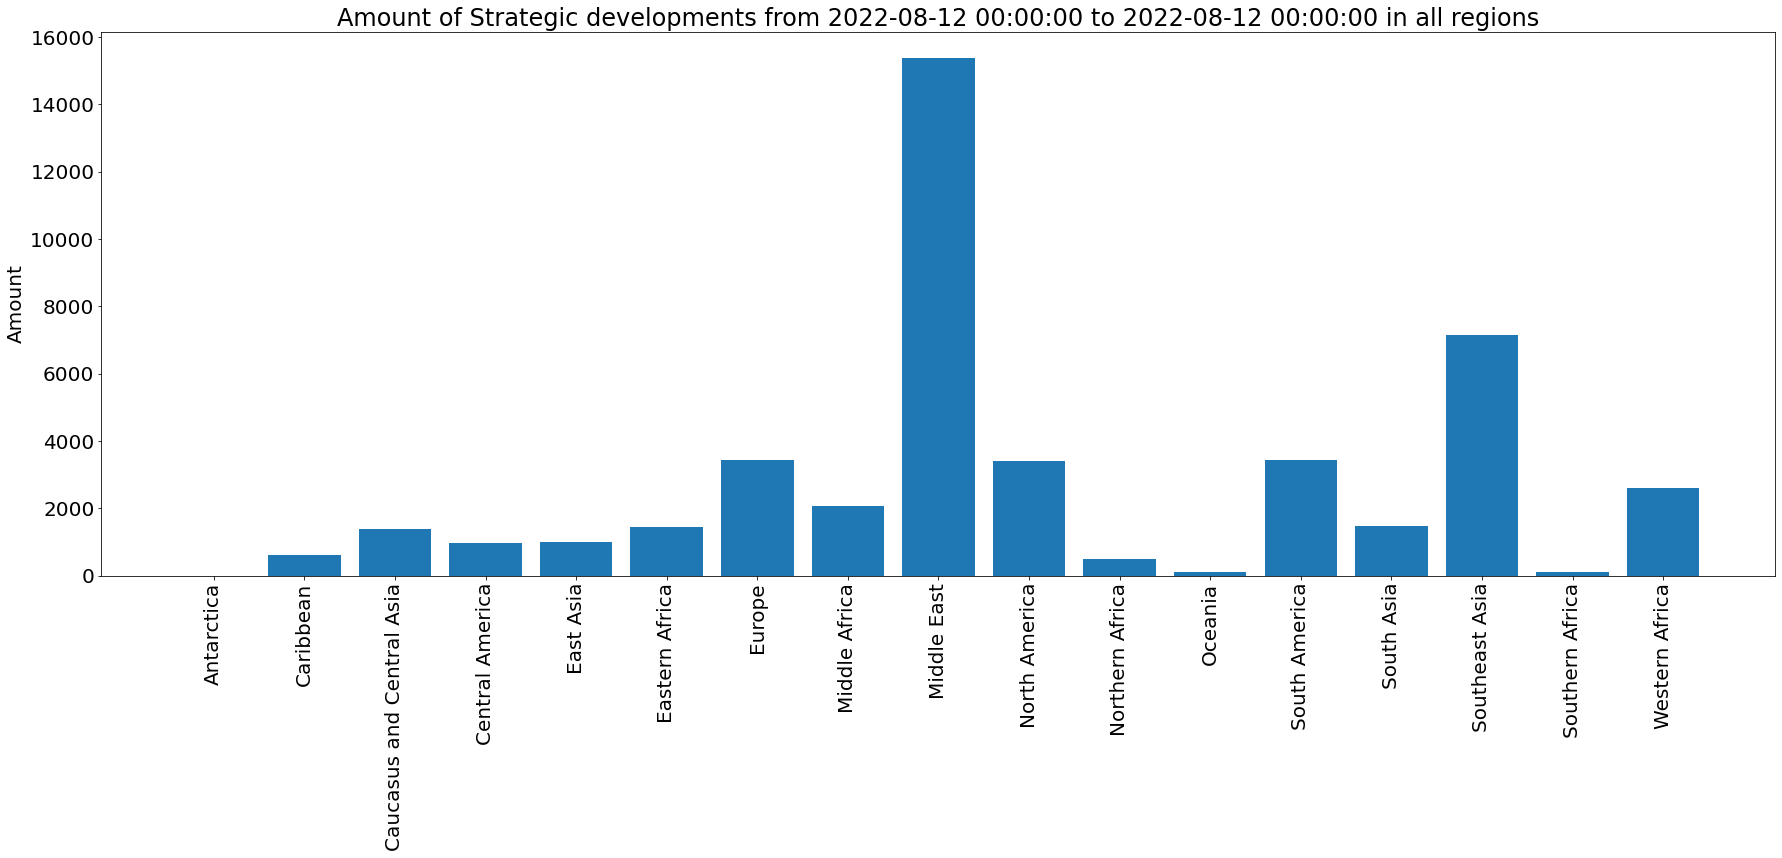

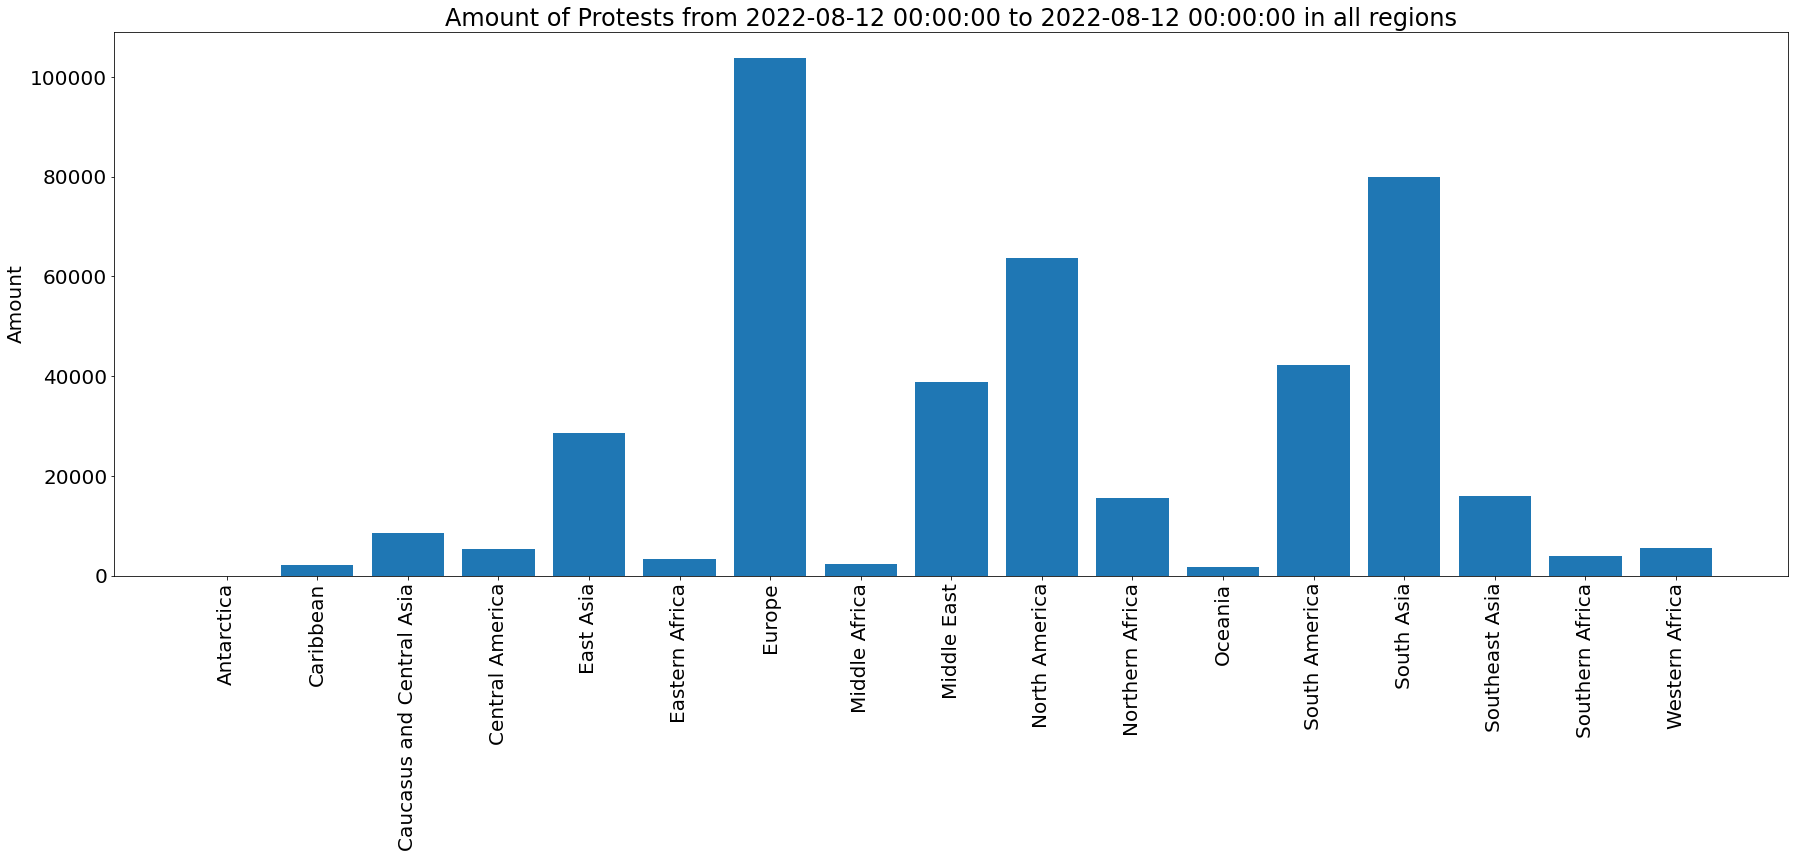

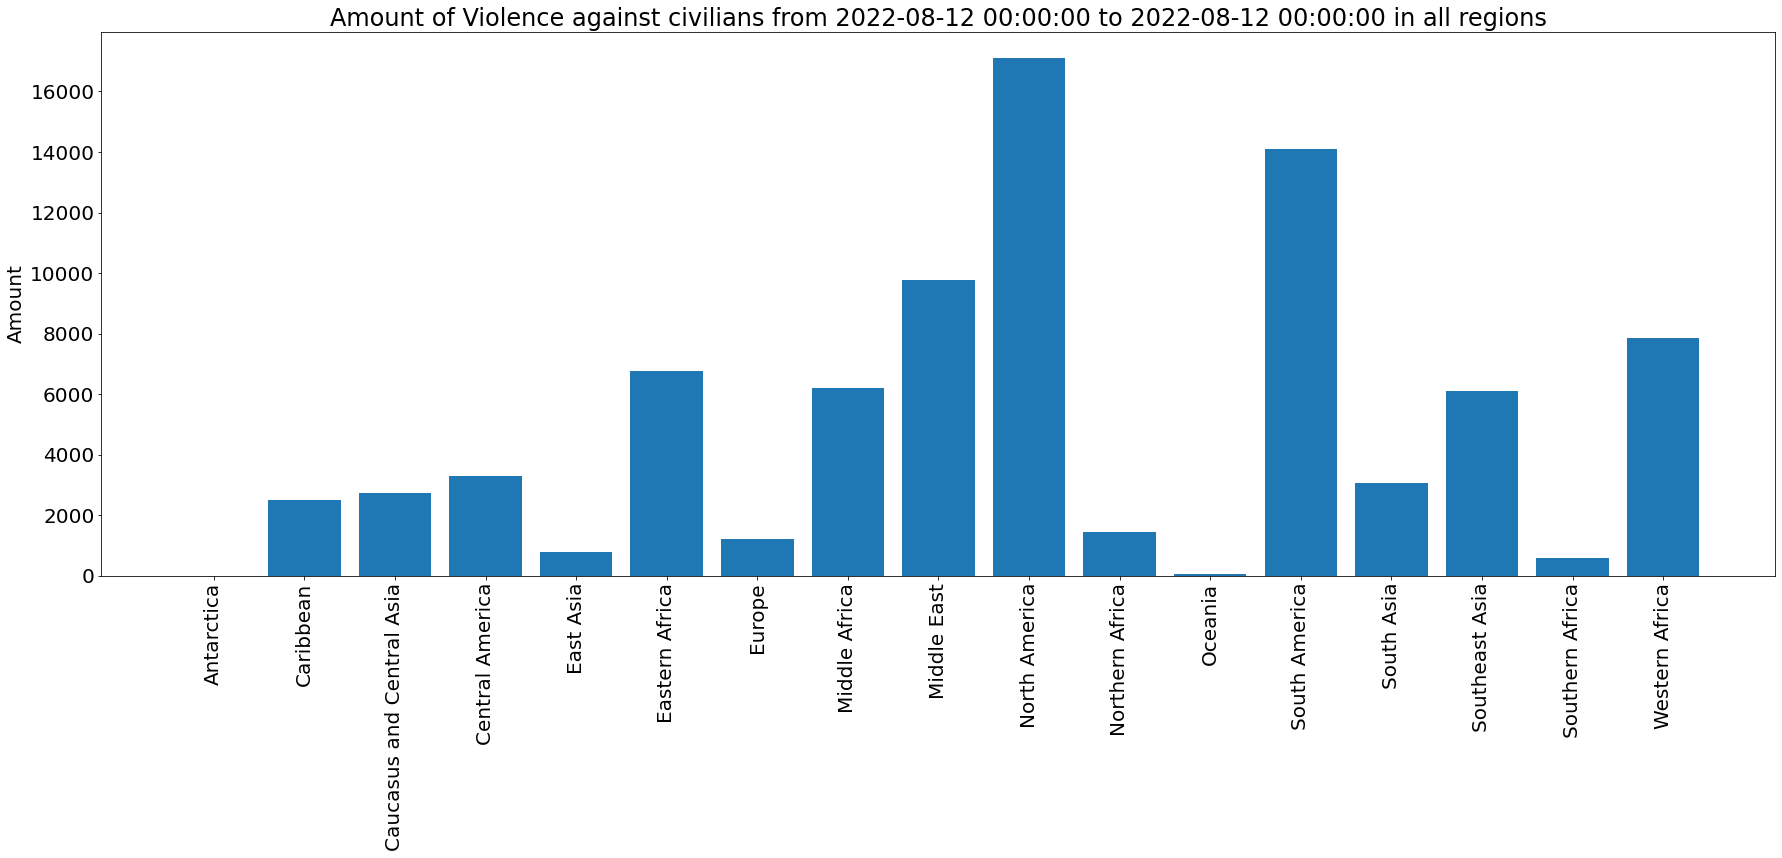

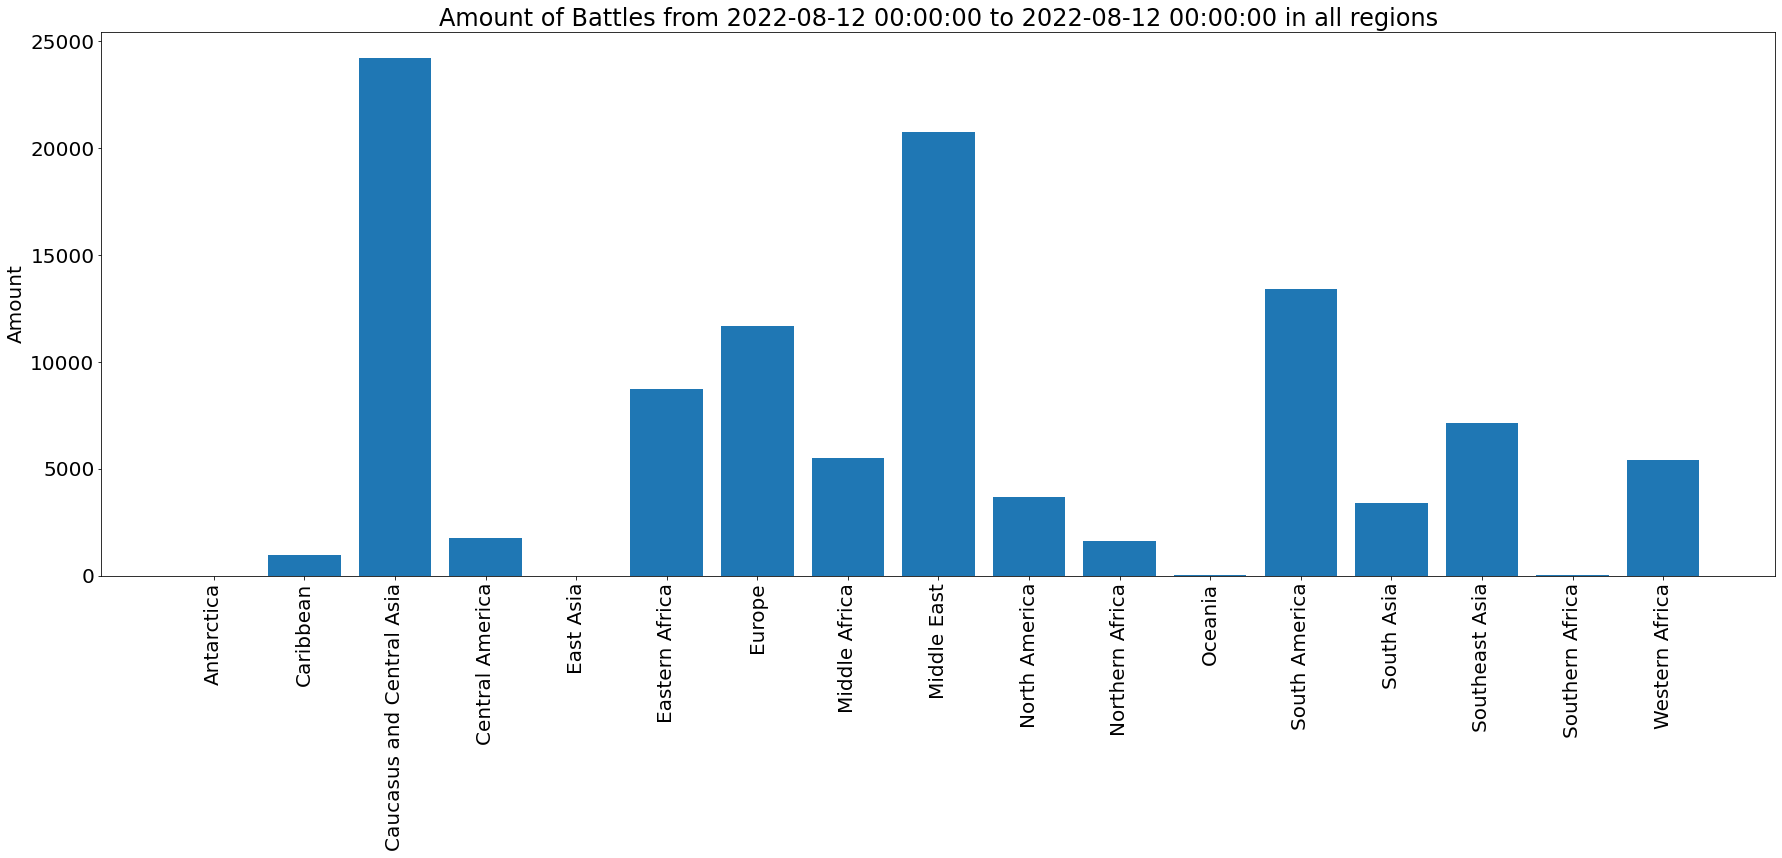

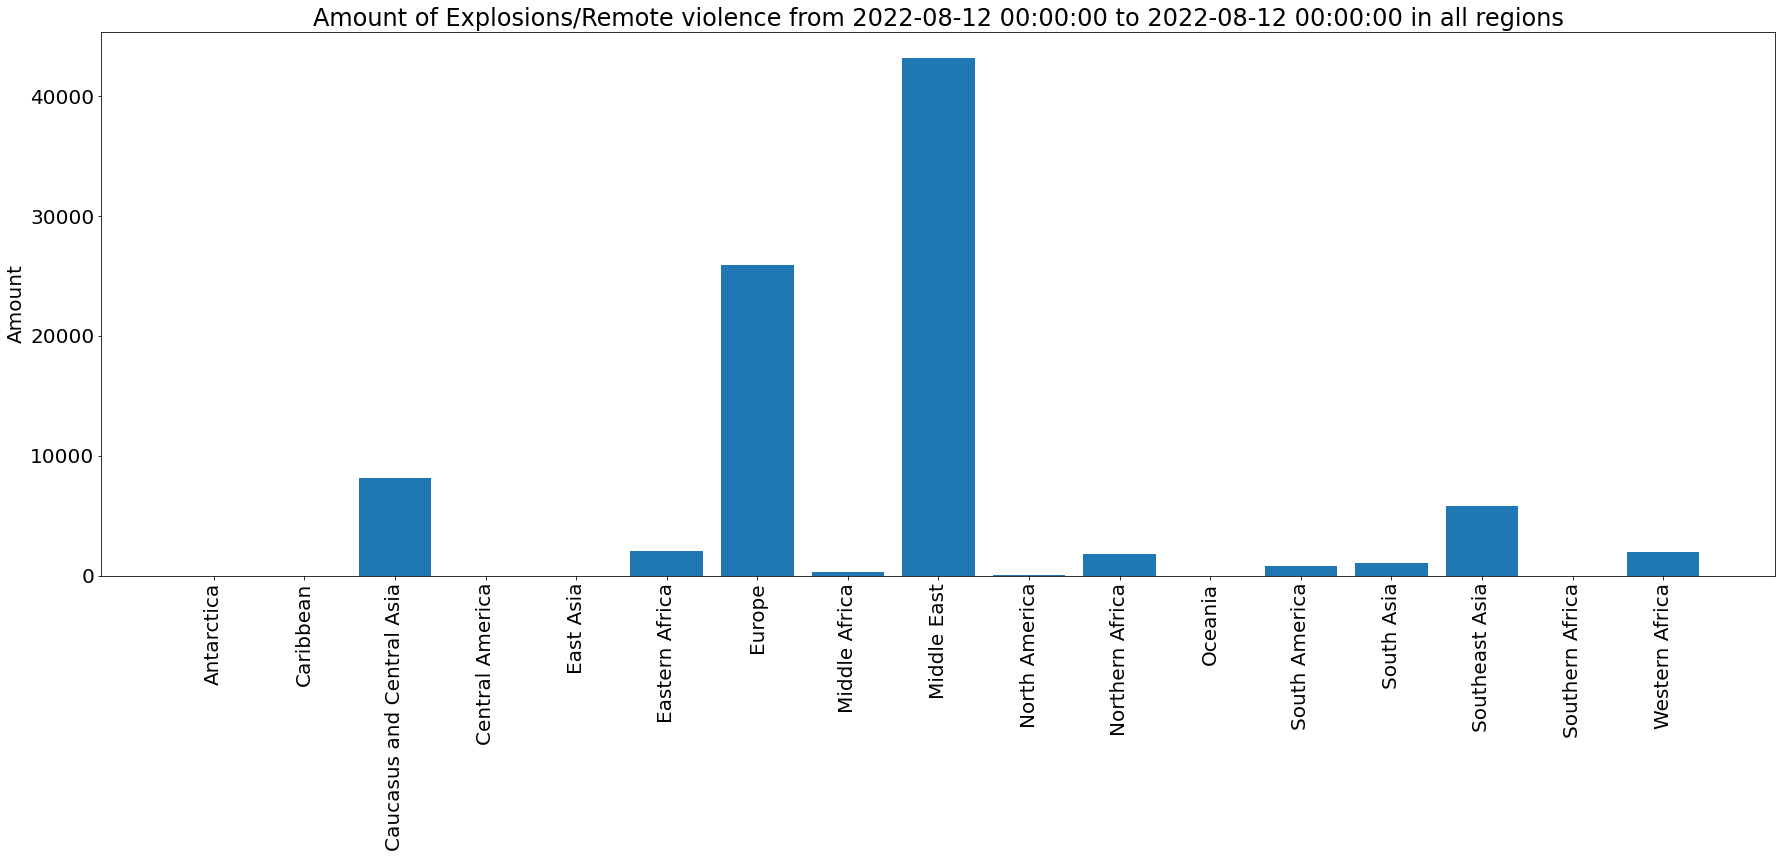

In [ ]:
for elem in df['event_type'].unique():  
  graph_bar(df_region['region'], df_region[elem], f'Amount of {elem} from {start} to {end} in all regions', '', 'Amount')
  print()

##Poland

In [ ]:
df_poland = df[df['country']=='Poland']

In [ ]:
df_poland_event_type_0 = df_poland['event_type'].unique()
amount_poland = []
event_type_poland = []

for elem in df_poland['event_type'].unique():
  event_type_poland.append(elem)
  amount_poland.append(df_poland[elem].sum())

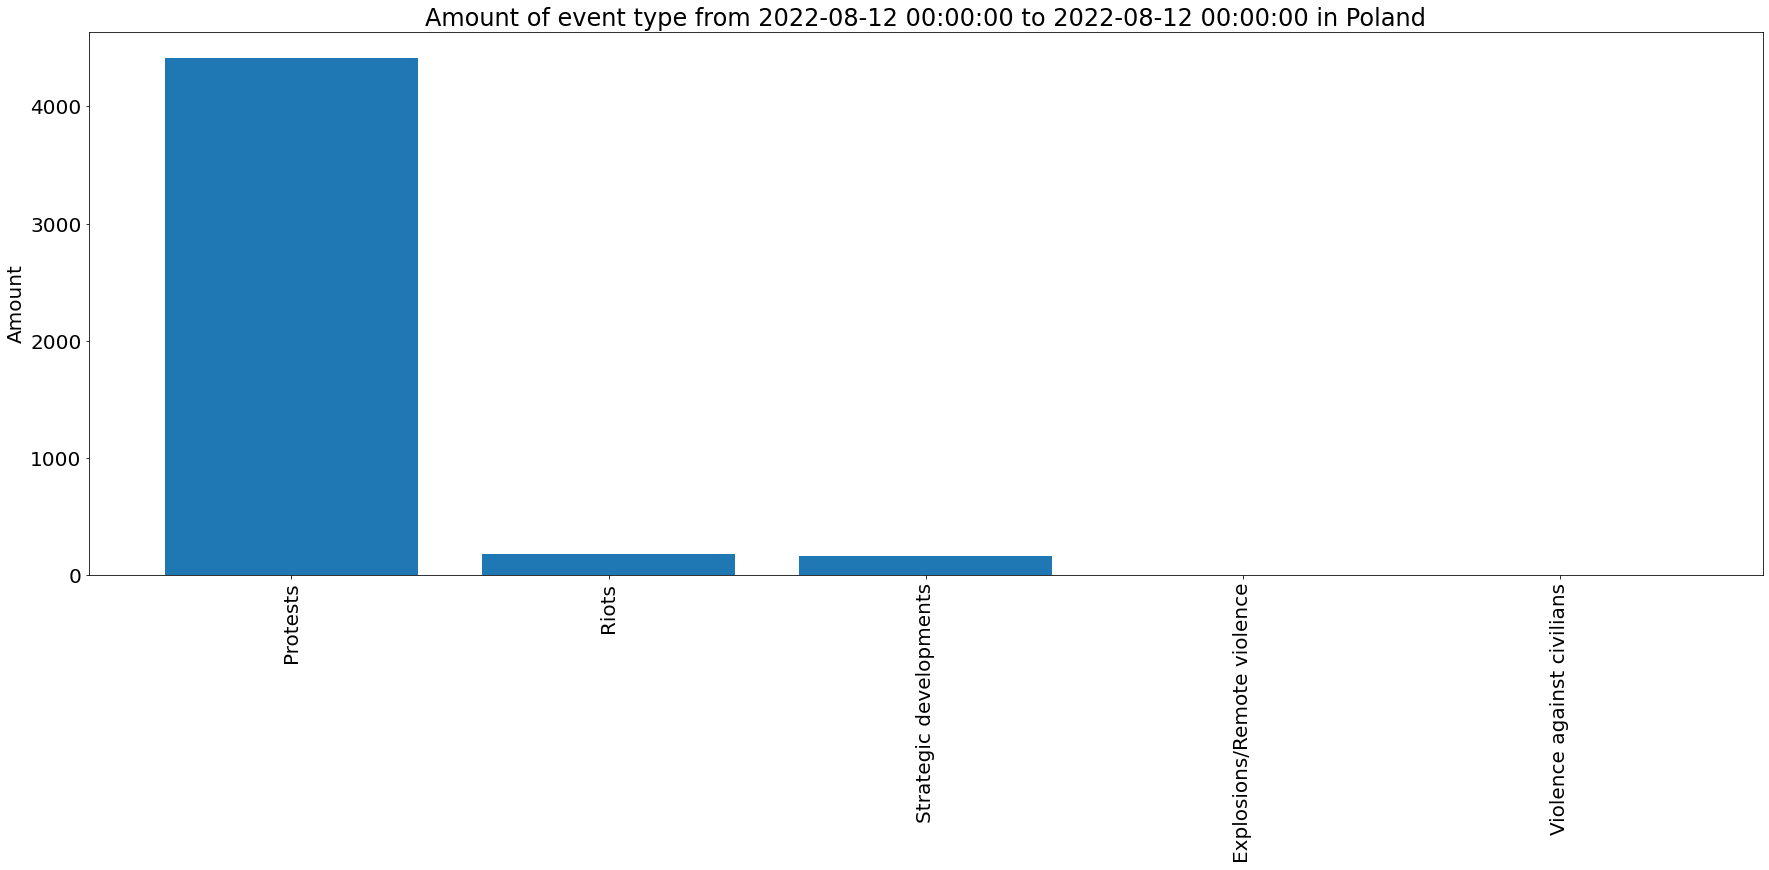

In [ ]:
graph_bar(event_type_poland, amount_poland, f'Amount of event type from {start} to {end} in Poland','', 'Amount')
print()

In [ ]:
df_event_date_poland = df_poland.groupby(['event_date']).sum().reset_index()

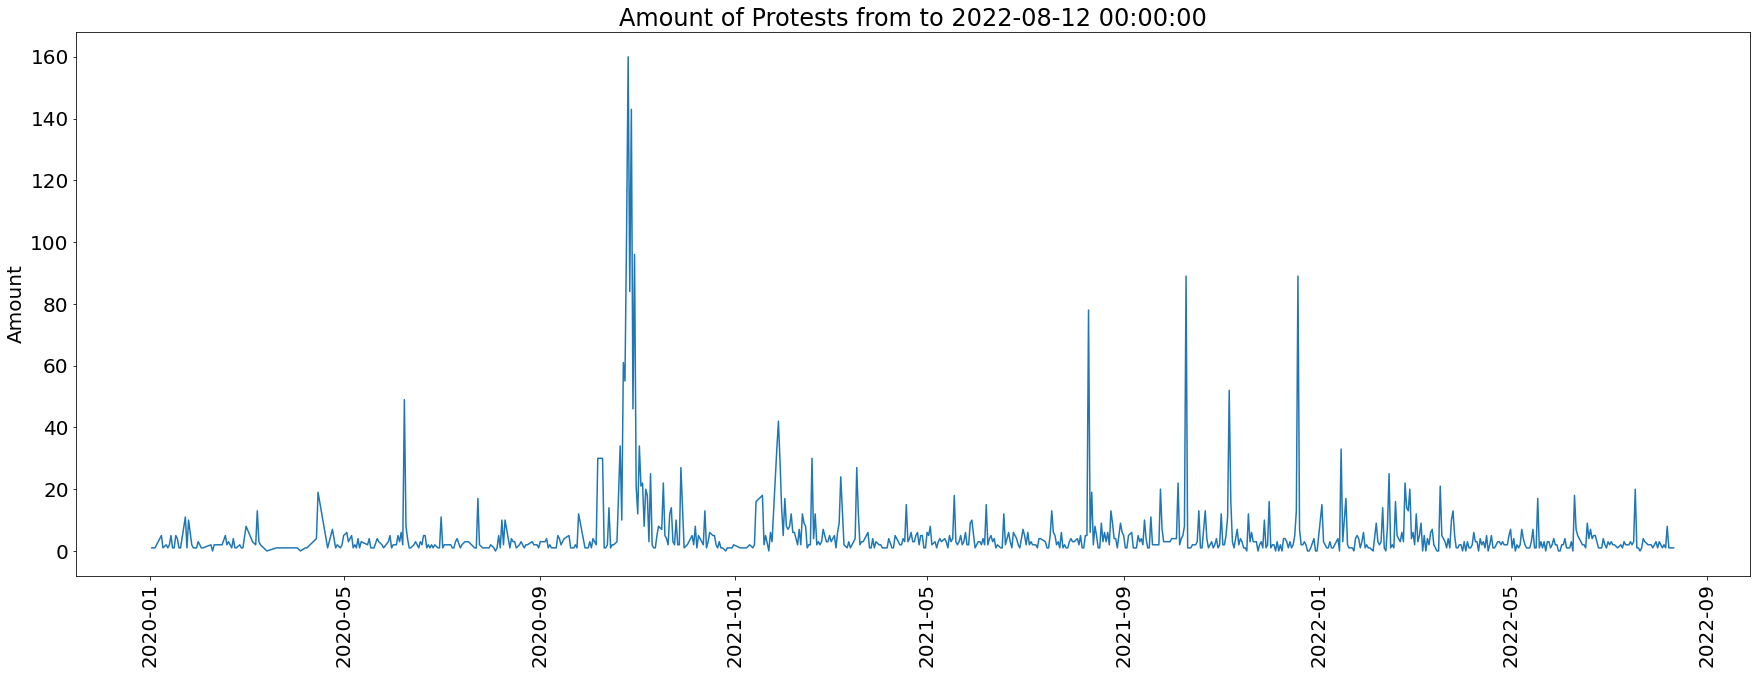

In [ ]:
graph_plot(df_event_date_poland['event_date'], df_event_date_poland['Protests'], f'Amount of Protests from to {end}', '', 'Amount')

#Model NLP

##Preproccesing

In [ ]:
data_model = data[['event_type','notes']]
data_model.sample(3)

,event_type,notes
410948,Protests,"On 25 February 2021, in Dawei town (Dawei Town..."
694457,Battles,"On 23 January 2020, in Manaus, Amazonas, FDN m..."
382636,Protests,"On 30 March 2021, in Comitan de Dominguez muni..."


In [ ]:
data_model['event_type'].value_counts()

Protests                      421920
Battles                       108336
Explosions/Remote violence     91202
Violence against civilians     83601
Riots                          48698
Strategic developments         45069
Name: event_type, dtype: int64

In [ ]:
limit = min(data_model['event_type'].value_counts())
limit

45069

In [ ]:
data_model_limit_1 = data_model[data_model['event_type']=='Riots'].sample(limit)
data_model_limit_2 = data_model[data_model['event_type']=='Strategic developments'].sample(limit)
data_model_limit_3 = data_model[data_model['event_type']=='Protests'].sample(limit)
data_model_limit_4 = data_model[data_model['event_type']=='Violence against civilians'].sample(limit)
data_model_limit_5 = data_model[data_model['event_type']=='Battles'].sample(limit)
data_model_limit_6 = data_model[data_model['event_type']=='Explosions/Remote violence'].sample(limit)

data_model_limit = pd.concat([data_model_limit_1,data_model_limit_2,data_model_limit_3,data_model_limit_4,data_model_limit_5,data_model_limit_6],  ignore_index=True)
data_model_limit['event_type'].value_counts()

Riots                         45069
Strategic developments        45069
Protests                      45069
Violence against civilians    45069
Battles                       45069
Explosions/Remote violence    45069
Name: event_type, dtype: int64

In [ ]:
data_model_limit = data_model_limit.sample(frac=1).reset_index(drop=True)
data_model_limit

,event_type,notes
0,Violence against civilians,"On 31 July 2022, in the rural area of San Migu..."
1,Protests,"On 23 October 2020, about 20 activists, mostly..."
2,Explosions/Remote violence,"On 3 July 2022, Russian forces fired mortars, ..."
3,Protests,"On 3 September 2020, coal miners protested in ..."
4,Battles,"On 17 July 2020, military forces of Azerbaijan..."
...,...,...
270409,Explosions/Remote violence,"On 19 December 2019, regime warplanes carried ..."
270410,Explosions/Remote violence,"On 15 April 2022, presumed JNIM militants shel..."
270411,Protests,"On 15 September 2021, members of the Korea Chi..."
270412,Explosions/Remote violence,"On 3 May 2022, Ukrainian forces fired 122mm mo..."


In [ ]:
X_0 = data_model_limit['notes']
y = data_model_limit['event_type']

###Regex

In [ ]:
re_1 = re.compile(r'\d\d\d\d.\s(.*).\[.*$')
re_2 = re.compile(r'\d\d\d\d.\s(.*).')
re_3 = re.compile(r'\W\s(.*).')
re_4 = re.compile(r'\W\s(.*).\[.*$')

def f_regex(x):
  try:
    re = re_1.search(x).group(1)
  except:
    try:
      re = re_2.search(x).group(1)
    except:
        try:
         re = re_3.search(x).group(1) 
        except:
          try:
            re = re_4.search(x).group(1) 
          except:
            re = x
  return re

In [ ]:
X_re = X_0.apply(f_regex)

###Small letter

In [ ]:
X_lower = X_re.map(lambda x: x.lower())

###Tokenize

In [ ]:
X_tokenize = X_lower.map(lambda x: word_tokenize(x))

###Stopwords and lemmatize

In [ ]:
stopWords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
interpunction = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', ':', ';', '<', '=', '>', '?', '@', '[', '', ']', '^', '_', '`', '{', '|', '}', '~']
X_lematizer = []
X = []

for n in range(len(X_tokenize)):
  for m in range(len(X_tokenize[n])):
    X_lematizer.append([])
    if X_tokenize[n][m] not in stopWords:
      if X_tokenize[n][m].isdigit()==False:
        if X_tokenize[n][m] not in interpunction:
            X_lematizer[n].append(lemmatizer.lemmatize(X_tokenize[n][m]))
  X.append(' '.join(X_lematizer[n]))
  

##Train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

##TFIDF

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train)

TfidfVectorizer()

In [ ]:
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)

##Logistic regression

In [ ]:
lr = LogisticRegression(max_iter = len(X))
lr.fit(X_train_tf, y_train)
y_pred_lr = lr.predict(X_test_tf)

In [ ]:
print(classification_report(y_test, y_pred_lr))

                            precision    recall  f1-score   support

                   Battles       0.94      0.91      0.92     13521
Explosions/Remote violence       0.96      0.96      0.96     13521
                  Protests       0.97      0.98      0.97     13521
                     Riots       0.93      0.94      0.93     13521
    Strategic developments       0.92      0.93      0.92     13521
Violence against civilians       0.90      0.91      0.91     13520

                  accuracy                           0.94     81125
                 macro avg       0.94      0.94      0.94     81125
              weighted avg       0.94      0.94      0.94     81125



##RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=5)
rfc.fit(X_train_tf, y_train)
y_pred_rfc = rfc.predict(X_test_tf)

In [ ]:
print(classification_report(y_test, y_pred_rfc))

                            precision    recall  f1-score   support

                   Battles       0.79      0.58      0.66     13521
Explosions/Remote violence       0.72      0.84      0.78     13521
                  Protests       0.75      0.88      0.81     13521
                     Riots       0.79      0.63      0.70     13521
    Strategic developments       0.60      0.54      0.57     13521
Violence against civilians       0.60      0.74      0.66     13520

                  accuracy                           0.70     81125
                 macro avg       0.71      0.70      0.70     81125
              weighted avg       0.71      0.70      0.70     81125



##Naive Bayes

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_tf, y_train)
y_pred_mnb = mnb.predict(X_test_tf)

In [ ]:
print(classification_report(y_test, y_pred_mnb))

                            precision    recall  f1-score   support

                   Battles       0.80      0.73      0.76     13521
Explosions/Remote violence       0.85      0.84      0.85     13521
                  Protests       0.91      0.91      0.91     13521
                     Riots       0.81      0.90      0.85     13521
    Strategic developments       0.78      0.73      0.75     13521
Violence against civilians       0.76      0.79      0.77     13520

                  accuracy                           0.82     81125
                 macro avg       0.82      0.82      0.82     81125
              weighted avg       0.82      0.82      0.82     81125



#Testing best model for random examples

In [ ]:
best_model = lr

In [ ]:
print('Enter your text: ')
test_bm = [input()]
X_lower = test_bm[0].lower()
X_tokenize = word_tokenize(X_lower)

X_lematizer = []
X = []


for m in range(len(X_tokenize)):
  if X_tokenize[m] not in stopWords:
    if X_tokenize[m].isdigit()==False:
      if X_tokenize[m] not in interpunction:
          X_lematizer.append(lemmatizer.lemmatize(X_tokenize[m]))
X = [' '.join(X_lematizer)]

X_test_bm = tfidf.transform(X)
y_pred_bm = best_model.predict(X_test_bm)
print()
print(f'Predicted class is {y_pred_bm}')
print()
print(best_model.classes_)
print()
y_pred_bm = best_model.predict_proba(X_test_bm)
print()
print(y_pred_bm)

Enter your text: 
a

Predicted class is ['Strategic developments']

['Battles' 'Explosions/Remote violence' 'Protests' 'Riots'
 'Strategic developments' 'Violence against civilians']


[[0.02522647 0.03619453 0.19130091 0.09421464 0.52702073 0.12604272]]
